In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
irs_ind_income = pd.read_csv('../data/irs_individual_data/17zpallagi.csv')
irs_np = pd.read_csv('../data/irs_np_data/all_us_np_data.csv')
cen_income = pd.read_csv('../data/dp02_income_data.csv')

#load this took a second or two, literally, heavy for jup

## IRS DF Scrub

In [5]:
#step 1: clean up irs dataset for columns that I will want.
# keep_columns = ['STATE', 'zipcode', 'agi_stub', 'A00100', 'A02650', 'A00200',]
column_dict = {'STATE':'State', 'zipcode': 'Zipcode', 'N1':'Number of returns',  'N02650': 'Number of returns with total income', 'A02650':'Total income amount', 'N00200':'Number of returns with salaries and wages','A00200': 'Salaries and wages amount'}

In [6]:
columns = []
for k, v in column_dict.items():
    columns.append(k)

In [8]:
irs_wip_df = irs_ind_income[['STATE',
 'zipcode',
 'N1',
 'N02650',
 'A02650',
 'N00200',
 'A00200']]

removed_zip_0 = irs_wip_df[irs_wip_df['zipcode'] != 0]
removed_zip_99999 = removed_zip_0[removed_zip_0['zipcode'] != 99999]

#started with 166537, after removing zips with 0 and 99999, left with 
#165923

#these rows are for areas that have pop under 100 and/or 

In [ ]:

# # new_header = cen_income.iloc[0] #grab the first row for the header
# # cen_income = cen_income[1:] #take the data less the header row
# # cen_income.columns = new_header #set the header row as the df header

# cen_income.drop([cen_income.columns[0], cen_income.columns[1]], axis=1).to_csv('../data/dp02_income_data_clean.csv')

In [9]:
irs_wip_df = removed_zip_99999

In [10]:
irs_wip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165925 entries, 6 to 166530
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   STATE    165925 non-null  object 
 1   zipcode  165925 non-null  int64  
 2   N1       165925 non-null  float64
 3   N02650   165925 non-null  float64
 4   A02650   165925 non-null  float64
 5   N00200   165925 non-null  float64
 6   A00200   165925 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.1+ MB


In [54]:
irs_wip_df.drop(['N00200','A00200'], axis=1).to_csv('../data/eda_irs_data.csv')

In [55]:
#identify if zipcodes are unique, they are not, group by them
irs_wip_df[irs_wip_df['zipcode']==78758]

,STATE,zipcode,N1,N02650,A02650,N00200,A00200
146566,TX,78758,7740.0,7740.0,109129.0,6350.0,89283.0
146567,TX,78758,7110.0,7110.0,260260.0,6600.0,232803.0
146568,TX,78758,3490.0,3490.0,215384.0,3250.0,189458.0
146569,TX,78758,1900.0,1900.0,165237.0,1750.0,139565.0
146570,TX,78758,2040.0,2040.0,270955.0,1890.0,226094.0
146571,TX,78758,440.0,440.0,196098.0,400.0,98984.0


In [58]:
#grouped zipcodes within states
irs_wip_df_grouped_zip = irs_wip_df.groupby(['STATE','zipcode'], as_index=False).sum().drop(['N00200','A00200'], axis=1)


In [60]:
#calcualte average individual income by zip code
irs_wip_df_grouped_zip['avg_income'] = irs_wip_df_grouped_zip['A02650']/irs_wip_df_grouped_zip['N1']
irs_wip_df_grouped_zip.to_csv('../data/eda_irszip_data.csv')

In [15]:
irs_wip_df_grouped_state = irs_wip_df.groupby(['STATE'], as_index=False).sum()
irs_wip_df_grouped_state.drop('zipcode', axis=1)
irs_wip_df_grouped_state['avg_income'] = irs_wip_df_grouped_state['A02650']/irs_wip_df_grouped_state['N1']

In [62]:
irs_wip_df_grouped_state.drop(['N00200','A00200'], axis)

,STATE,zipcode,N1,N02650,A02650,N00200,A00200,avg_income
0,AK,31685718,271430.0,271430.0,1.981859e+07,228620.0,1.363847e+07,73.015474
1,AL,123817728,2004610.0,2004610.0,1.182767e+08,1680900.0,8.245736e+07,59.002342
2,AR,211956168,1184370.0,1184370.0,7.319250e+07,996860.0,4.716417e+07,61.798674
3,AZ,150362748,2826980.0,2826980.0,1.932967e+08,2307910.0,1.272016e+08,68.375681
4,CA,828223513,17450170.0,17450150.0,1.530930e+09,14498110.0,1.017844e+09,87.731510
5,CO,189895956,2599210.0,2599210.0,2.105626e+08,2190880.0,1.392827e+08,81.010233
6,CT,10091208,1735330.0,1735330.0,1.777223e+08,1440270.0,1.138308e+08,102.414129
7,DC,2641872,342150.0,342150.0,3.531296e+07,296140.0,2.378140e+07,103.208999
8,DE,6560856,455480.0,455480.0,3.160576e+07,376640.0,2.105562e+07,69.390004
9,FL,183358536,9811550.0,9811550.0,7.341267e+08,7797000.0,4.171837e+08,74.822706


In [16]:
irs_wip_df_grouped_state.head()

,STATE,zipcode,N1,N02650,A02650,N00200,A00200,avg_income
0,AK,31685718,271430.0,271430.0,1.981859e+07,228620.0,1.363847e+07,73.015474
1,AL,123817728,2004610.0,2004610.0,1.182767e+08,1680900.0,8.245736e+07,59.002342
2,AR,211956168,1184370.0,1184370.0,7.319250e+07,996860.0,4.716417e+07,61.798674
3,AZ,150362748,2826980.0,2826980.0,1.932967e+08,2307910.0,1.272016e+08,68.375681
4,CA,828223513,17450170.0,17450150.0,1.530930e+09,14498110.0,1.017844e+09,87.731510


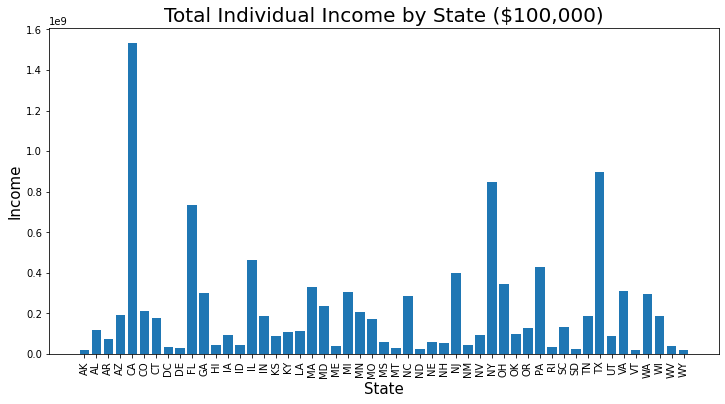

In [17]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(irs_wip_df_grouped_state['STATE'], height=irs_wip_df_grouped_state['A02650'])
ax.set_title('Total Individual Income by State ($100,000)', size=20)
ax.set_xticklabels(irs_wip_df_grouped_state['STATE'], rotation=90)
ax.set_xlabel('State', size=15)
ax.set_ylabel('Income', size=15)
fig.savefig('../images/total_ind_income_state.png');

## NP DF Scrub

In [18]:
irs_np.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764827 entries, 0 to 1764826
Data columns (total 29 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        int64  
 1   EIN               int64  
 2   NAME              object 
 3   ICO               object 
 4   STREET            object 
 5   CITY              object 
 6   STATE             object 
 7   ZIP               object 
 8   GROUP             int64  
 9   SUBSECTION        int64  
 10  AFFILIATION       int64  
 11  CLASSIFICATION    int64  
 12  RULING            int64  
 13  DEDUCTIBILITY     int64  
 14  FOUNDATION        int64  
 15  ACTIVITY          int64  
 16  ORGANIZATION      int64  
 17  STATUS            int64  
 18  TAX_PERIOD        float64
 19  ASSET_CD          int64  
 20  INCOME_CD         int64  
 21  FILING_REQ_CD     int64  
 22  PF_FILING_REQ_CD  int64  
 23  ACCT_PD           int64  
 24  ASSET_AMT         float64
 25  INCOME_AMT        float64
 26  REVENUE_AMT   

In [23]:
np_irs_col = irs_np.drop(['Unnamed: 0','EIN','ICO','GROUP','AFFILIATION','RULING', 'DEDUCTIBILITY', 'ACTIVITY','ORGANIZATION','STATUS', 'TAX_PERIOD','ASSET_CD','INCOME_CD','FILING_REQ_CD','PF_FILING_REQ_CD','ACCT_PD','SORT_NAME'], axis=1)

In [24]:
np_irs_col.head()

,NAME,STREET,CITY,STATE,ZIP,SUBSECTION,CLASSIFICATION,FOUNDATION,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD
0,PALMER SECOND BAPTIST CHURCH,1050 THORNDIKE ST,PALMER,MA,01069-1507,3,7000,10,NaN,NaN,NaN,NaN
1,ST GEORGE CATHEDRAL,523 E BROADWAY,SOUTH BOSTON,MA,02127-4415,3,7000,10,NaN,NaN,NaN,NaN
2,IGLESIA BETHESDA INC,157 ANDOVER ST,LOWELL,MA,01852-2348,3,7000,10,NaN,NaN,NaN,X21
3,MINISTERIO APOSTOLICO JESUCRISTO ES EL SENOR INC,454 ESSEX ST,LAWRENCE,MA,01840-1242,3,7000,10,NaN,NaN,NaN,X21
4,MERCY CHAPEL INTERNATIONAL,75 MORTON VILLAGE DR APT 408,MATTAPAN,MA,02126-2433,3,7000,10,NaN,NaN,NaN,X20


In [46]:
#dropped all rows where rev_amt & state had null value. State null
#means out of country registered in US
np_irs_col_null = np_irs_col.dropna(subset=['STATE','REVENUE_AMT'],axis=0).drop('STREET', axis=1)

In [47]:
np_irs_col_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258774 entries, 12 to 1764811
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   NAME            1258774 non-null  object 
 1   CITY            1258774 non-null  object 
 2   STATE           1258774 non-null  object 
 3   ZIP             1258774 non-null  object 
 4   SUBSECTION      1258774 non-null  int64  
 5   CLASSIFICATION  1258774 non-null  int64  
 6   FOUNDATION      1258774 non-null  int64  
 7   ASSET_AMT       1258774 non-null  float64
 8   INCOME_AMT      1258774 non-null  float64
 9   REVENUE_AMT     1258774 non-null  float64
 10  NTEE_CD         850459 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 115.2+ MB


In [48]:
#split zipcode & postal code so I can match with income & census data
np_irs_col_null['zipcode'] = np_irs_col_null['ZIP'].str.split('-', expand=True)[0]

In [50]:
np_irs_col_null['zipcode'].value_counts()

50312    6397
39236    1524
20036    1376
64114    1322
46268    1251
         ... 
67470       1
37729       1
84621       1
33521       1
22718       1
Name: zipcode, Length: 35517, dtype: int64